# Used algorithms 

## Creating dataframe


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Data/cleaned_data.csv")

In [3]:
df

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
0,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,0.0568,...,1.0000,0.0000,0.0625,2,1,0,0,0,0,444
1,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,0.0754,...,0.9091,0.7692,0.2222,0,1,0,0,1,0,625
2,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,0.0374,...,1.0000,1.4286,0.0578,2,1,0,0,1,0,469
3,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,0.0850,...,1.0000,1.2500,0.1282,2,1,0,0,1,0,559
4,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,0.0132,...,0.9091,0.1163,0.0568,2,1,1,1,1,1,473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,328892,1465066,5501471,4.4546,16.7273,3.7551,16701,10132,0.6067,0.0508,...,0.9091,0.2041,0.0543,2,1,1,1,1,1,418
996,81404,88805,680837,1.0909,8.3637,7.6667,5400,1936,0.3585,0.0663,...,0.9091,0.8333,0.1087,0,1,0,0,1,0,589
997,0,42428,30760,3.2379,8.1889,0.7250,0,0,0.8779,0.0047,...,1.0668,0.2500,0.3448,0,1,0,0,1,0,499
998,36011,8002,604181,0.2222,16.7777,75.5037,1993,1271,0.6377,0.0553,...,1.1111,5.0002,0.0662,0,1,1,0,1,0,507


## Scaling

In [4]:
import json

min_scores = df.min(axis=0)
max_scores = df.max(axis=0)

json_dict = dict()
for i in range(df.shape[1]):
    json_dict[df.columns[i]] = [min_scores[i], max_scores[i]]

with open("Data/scaling_values.json", "w") as json_file:
    json.dump(json_dict, json_file, indent=4)


C:\Users\Gor78\AppData\Local\Temp\ipykernel_14748\2397610748.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  json_dict[df.columns[i]] = [min_scores[i], max_scores[i]]


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [6]:
scaled_df = scaler.fit_transform(df)

In [7]:
df = pd.DataFrame(scaled_df, columns=df.columns)

In [8]:
df

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
0,0.050248,0.000000,0.089184,0.000000,0.432425,0.004098,0.043671,0.023674,0.472739,0.215062,...,0.249944,0.000000,0.006247,1.0,1.0,0.0,0.0,0.0,0.0,0.288
1,0.116536,0.031316,0.052885,0.073353,0.110563,0.011820,0.134505,0.002781,0.018048,0.289972,...,0.181777,0.076844,0.022208,0.0,1.0,0.0,0.0,1.0,0.0,0.650
2,0.046696,0.007432,0.089613,0.043448,0.467560,0.084394,0.026748,0.021544,0.702353,0.136931,...,0.249944,0.142719,0.005777,1.0,1.0,0.0,0.0,1.0,0.0,0.338
3,0.121821,0.022160,0.105405,0.049655,0.210807,0.033294,0.158525,0.092339,0.507985,0.328635,...,0.249944,0.124876,0.012813,1.0,1.0,0.0,0.0,1.0,0.0,0.518
4,0.226510,0.402662,0.402024,0.485265,0.432425,0.006988,0.045729,0.008067,0.153832,0.039468,...,0.181777,0.011618,0.005677,1.0,1.0,1.0,1.0,1.0,1.0,0.346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.496745,0.503137,0.921732,0.276491,0.452082,0.012823,0.386106,0.253820,0.573278,0.190898,...,0.181777,0.020390,0.005427,1.0,1.0,1.0,1.0,1.0,1.0,0.236
996,0.122949,0.030498,0.114069,0.067711,0.226042,0.026180,0.124841,0.048499,0.338751,0.253323,...,0.181777,0.083248,0.010864,0.0,1.0,0.0,0.0,1.0,0.0,0.578
997,0.000000,0.014571,0.005154,0.200972,0.221318,0.002476,0.000000,0.000000,0.829538,0.005236,...,0.300037,0.024975,0.034462,0.0,1.0,0.0,0.0,1.0,0.0,0.398
998,0.054390,0.002748,0.101226,0.013792,0.453444,0.257831,0.046076,0.031840,0.602570,0.209021,...,0.333258,0.499525,0.006616,0.0,1.0,1.0,0.0,1.0,0.0,0.414


In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.shape, y.shape

((1000, 84), (1000,))

## SelectKBest with f_regression

In [10]:
from sklearn.feature_selection import SelectKBest, f_regression

In [11]:
# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')

In [13]:
# Define the number of iterations
num_iterations = 5
scores_dict = dict()
# Iterate over the number of iterations
for iteration in range(num_iterations):
    # Randomly choose 600 rows
    chosen_idx = np.random.choice(X.shape[0], replace=False, size=600)
    
    # Subset data and labels
    data_chosen = X.iloc[chosen_idx].reset_index(drop=True)
    label_chosen = y.iloc[chosen_idx].reset_index(drop=True)
    
    # Perform feature selection
    selected_features = fs.fit_transform(data_chosen, label_chosen)
    
    # Get indices of selected features
    # selected_indices = fs.pvalues_
    
    selected_indices = np.argsort(fs.scores_)[::-1]
    selected_features = X.columns[selected_indices]
    
    if not scores_dict:
        for key, value in zip(selected_features, np.sort(fs.scores_)[::-1]):
            scores_dict[key] = [value]
    else:
        for key, value in zip(selected_features, np.sort(fs.scores_)[::-1]):
            scores_dict[key].append(value)
        
    # Print selected features (indices)
    print(f"Iteration {iteration + 1}: Selected features indices: {list(zip(selected_features, np.sort(fs.scores_)[::-1]))}")

scores_mean_dict  = scores_dict.copy()
for key, value in scores_dict.items():
    scores_mean_dict[key] = np.mean(value)

Iteration 1: Selected features indices: [('R_DEBT_INCOME', 1713.67166670584), ('R_DEBT_SAVINGS', 205.32693493251077), ('DEBT', 90.62559884001388), ('R_UTILITIES_DEBT', 70.00304913753028), ('R_EXPENDITURE_DEBT', 65.99334920209283), ('R_GROCERIES_DEBT', 62.49516905365681), ('R_EDUCATION_INCOME', 50.67079171450797), ('R_HEALTH_DEBT', 48.94494842246459), ('R_ENTERTAINMENT_DEBT', 47.638756341398185), ('R_TAX_DEBT', 41.21007849751879), ('CAT_CREDIT_CARD', 38.33416116923636), ('R_CLOTHING_DEBT', 37.44942095945852), ('R_SAVINGS_INCOME', 36.46014419306829), ('R_HOUSING_DEBT', 34.03912887408769), ('R_TRAVEL_DEBT', 32.60524795401911), ('R_UTILITIES_SAVINGS', 26.66426541820078), ('CAT_DEBT', 21.863306029271296), ('R_EXPENDITURE', 21.727978122008494), ('R_GROCERIES_INCOME', 20.319468761911097), ('CAT_GAMBLING', 19.028042787919272), ('R_GROCERIES_SAVINGS', 18.694308543862174), ('R_HEALTH_INCOME', 17.739900685217414), ('R_HEALTH_SAVINGS', 17.188802356856282), ('R_EDUCATION_SAVINGS', 17.02290281579845

In [14]:
print(sorted(scores_mean_dict.items(), key=lambda x: x[1], reverse=True))

[('R_DEBT_INCOME', 1683.4063065991413), ('R_DEBT_SAVINGS', 168.2132146755658), ('DEBT', 78.18319540163134), ('R_EXPENDITURE_DEBT', 65.23515361951269), ('R_UTILITIES_DEBT', 64.46452359283504), ('R_TAX_DEBT', 60.68445022181523), ('R_EDUCATION_INCOME', 59.26549949586695), ('R_GROCERIES_DEBT', 58.080396572678254), ('R_ENTERTAINMENT_DEBT', 51.68900753142037), ('R_HEALTH_DEBT', 44.63423234581633), ('R_SAVINGS_INCOME', 41.94446377823257), ('R_CLOTHING_DEBT', 39.34480853305387), ('R_TRAVEL_DEBT', 35.60649413783073), ('CAT_CREDIT_CARD', 34.25849367573522), ('R_HOUSING_DEBT', 34.23127978430629), ('R_EDUCATION_SAVINGS', 30.366748555771267), ('R_UTILITIES_SAVINGS', 29.164455095038353), ('R_HEALTH_SAVINGS', 26.70256030182494), ('R_GROCERIES_SAVINGS', 24.8702504231562), ('CAT_GAMBLING', 24.086978695790577), ('CAT_DEBT', 21.865013510650147), ('R_EXPENDITURE', 19.912653077495758), ('R_GROCERIES_INCOME', 18.55097793606351), ('R_HEALTH_INCOME', 16.756606396481523), ('R_ENTERTAINMENT_INCOME', 15.34843680

In [15]:
scores_mean_dict

{'R_DEBT_INCOME': 1683.4063065991413,
 'R_DEBT_SAVINGS': 168.2132146755658,
 'DEBT': 78.18319540163134,
 'R_UTILITIES_DEBT': 64.46452359283504,
 'R_EXPENDITURE_DEBT': 65.23515361951269,
 'R_GROCERIES_DEBT': 58.080396572678254,
 'R_EDUCATION_INCOME': 59.26549949586695,
 'R_HEALTH_DEBT': 44.63423234581633,
 'R_ENTERTAINMENT_DEBT': 51.68900753142037,
 'R_TAX_DEBT': 60.68445022181523,
 'CAT_CREDIT_CARD': 34.25849367573522,
 'R_CLOTHING_DEBT': 39.34480853305387,
 'R_SAVINGS_INCOME': 41.94446377823257,
 'R_HOUSING_DEBT': 34.23127978430629,
 'R_TRAVEL_DEBT': 35.60649413783073,
 'R_UTILITIES_SAVINGS': 29.164455095038353,
 'CAT_DEBT': 21.865013510650147,
 'R_EXPENDITURE': 19.912653077495758,
 'R_GROCERIES_INCOME': 18.55097793606351,
 'CAT_GAMBLING': 24.086978695790577,
 'R_GROCERIES_SAVINGS': 24.8702504231562,
 'R_HEALTH_INCOME': 16.756606396481523,
 'R_HEALTH_SAVINGS': 26.70256030182494,
 'R_EDUCATION_SAVINGS': 30.366748555771267,
 'R_ENTERTAINMENT_INCOME': 15.348436807473348,
 'R_HOUSING_SAVI

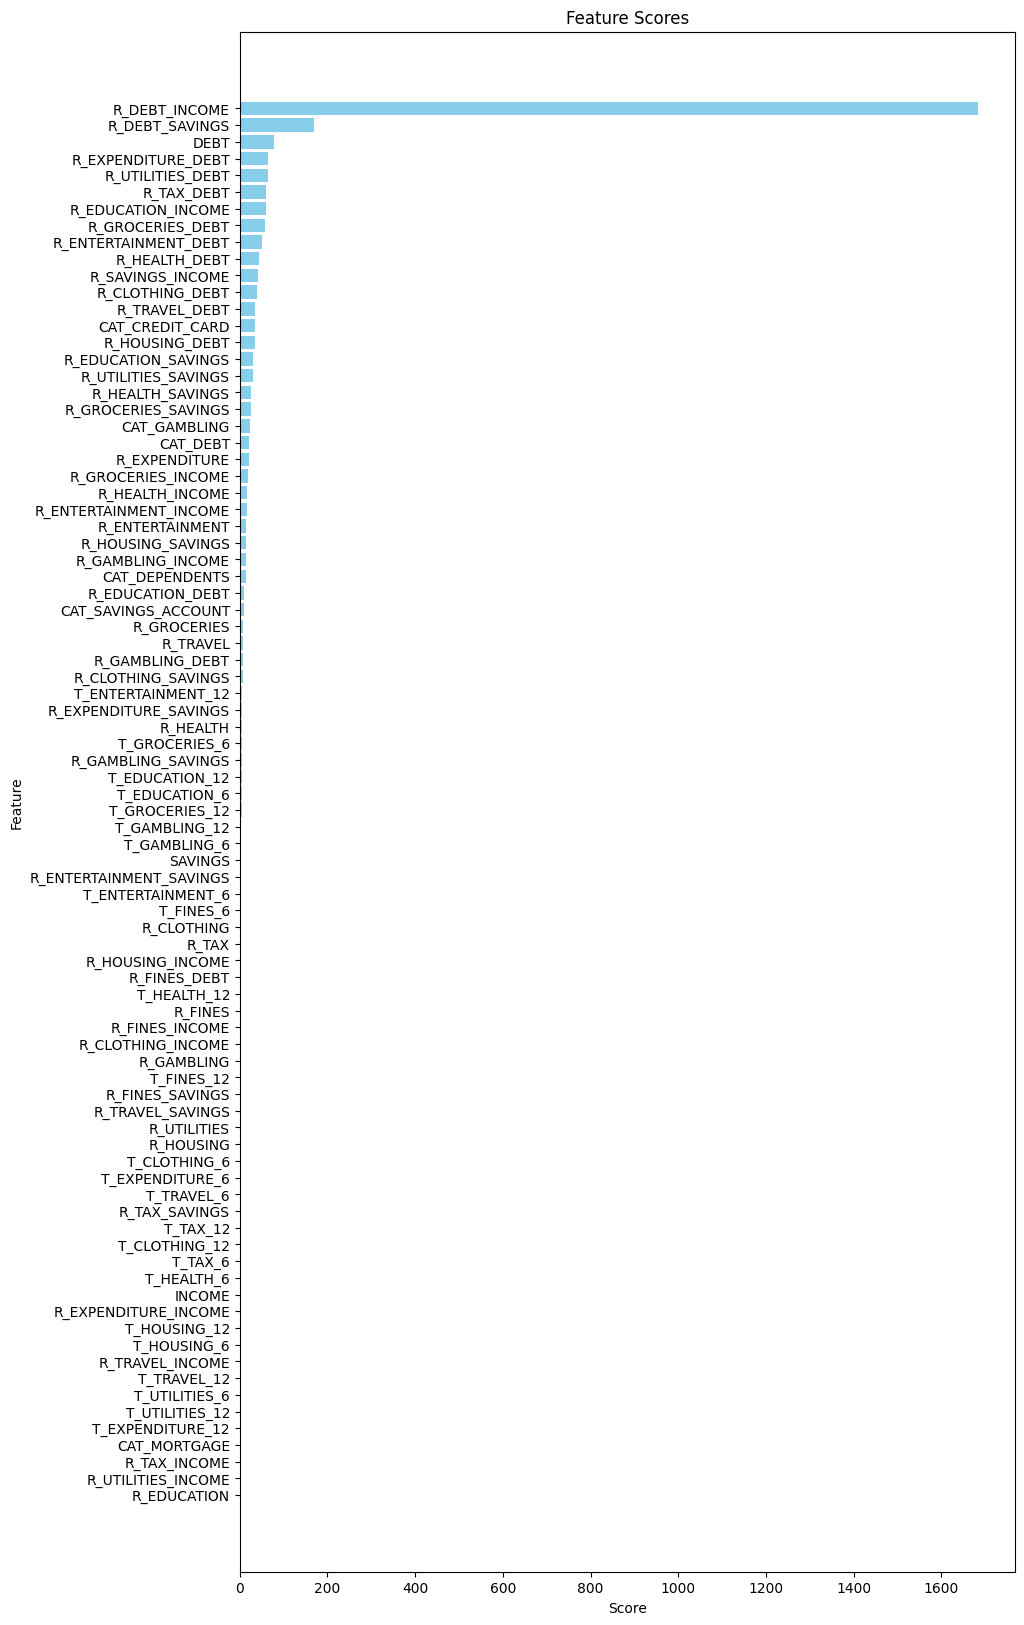

In [16]:
sorted_scores = sorted(scores_mean_dict.items(), key=lambda x: x[1], reverse=True)
sorted_features = [x[0] for x in sorted_scores]
sorted_values = [x[1] for x in sorted_scores]

# Create bar plot
plt.figure(figsize=(10, 20))
plt.barh(sorted_features, sorted_values, color='skyblue')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Scores')
plt.gca().invert_yaxis()  # Invert y-axis to show highest score on top
plt.show()

In [17]:
sorted_df = X[sorted_features]

In [18]:
sorted_df

,R_DEBT_INCOME,R_DEBT_SAVINGS,DEBT,R_EXPENDITURE_DEBT,R_UTILITIES_DEBT,R_TAX_DEBT,R_EDUCATION_INCOME,R_GROCERIES_DEBT,R_ENTERTAINMENT_DEBT,R_HEALTH_DEBT,...,T_HOUSING_6,R_TRAVEL_INCOME,T_TRAVEL_12,T_UTILITIES_6,T_UTILITIES_12,T_EXPENDITURE_12,CAT_MORTGAGE,R_TAX_INCOME,R_UTILITIES_INCOME,R_EDUCATION
0,0.432425,0.004098,0.089184,0.006247,0.001717,0.000000,0.000000,0.002984,0.001862,0.000295,...,0.036091,0.385050,0.082625,0.045463,0.045406,0.068028,0.0,0.000000,0.179028,0.651934
1,0.110563,0.011820,0.052885,0.022208,0.009089,0.016195,0.000000,0.005443,0.017533,0.000738,...,0.196213,0.187728,0.093435,0.137941,0.138753,0.146195,0.0,0.285714,0.235934,0.414365
2,0.467560,0.084394,0.089613,0.005777,0.001616,0.000000,0.000000,0.002656,0.002184,0.000837,...,0.033102,0.372163,0.074216,0.041780,0.041699,0.063042,0.0,0.000000,0.177110,0.530387
3,0.210807,0.033294,0.105405,0.012813,0.003535,0.006941,0.102980,0.002361,0.006872,0.001624,...,0.151555,0.222238,0.115619,0.107794,0.107735,0.168480,0.0,0.232143,0.175192,0.585635
4,0.432425,0.006988,0.402024,0.005677,0.004343,0.004113,0.000000,0.004754,0.000706,0.001526,...,0.512280,0.134460,0.130067,0.503102,0.504194,0.286510,1.0,0.293527,0.440537,0.569061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.452082,0.012823,0.921732,0.005427,0.003535,0.003085,0.000000,0.004459,0.000578,0.001280,...,0.959898,0.161738,0.343088,0.940481,0.941524,0.631304,1.0,0.227679,0.375320,0.740331
996,0.226042,0.026180,0.114069,0.010864,0.005150,0.010797,0.000000,0.003377,0.013615,0.001280,...,0.000000,0.216582,0.113711,0.168767,0.169723,0.154377,0.0,0.396205,0.273018,0.480663
997,0.221318,0.002476,0.005154,0.034462,0.008786,0.000000,0.000000,0.006492,0.000000,0.002363,...,0.009349,0.098948,0.040654,0.013086,0.013071,0.019990,0.0,0.386161,0.473785,0.552486
998,0.453444,0.257831,0.101226,0.006616,0.001818,0.000000,0.503961,0.003279,0.001895,0.000689,...,0.042617,0.263335,0.061157,0.053315,0.053502,0.082322,0.0,0.000000,0.195013,0.453039


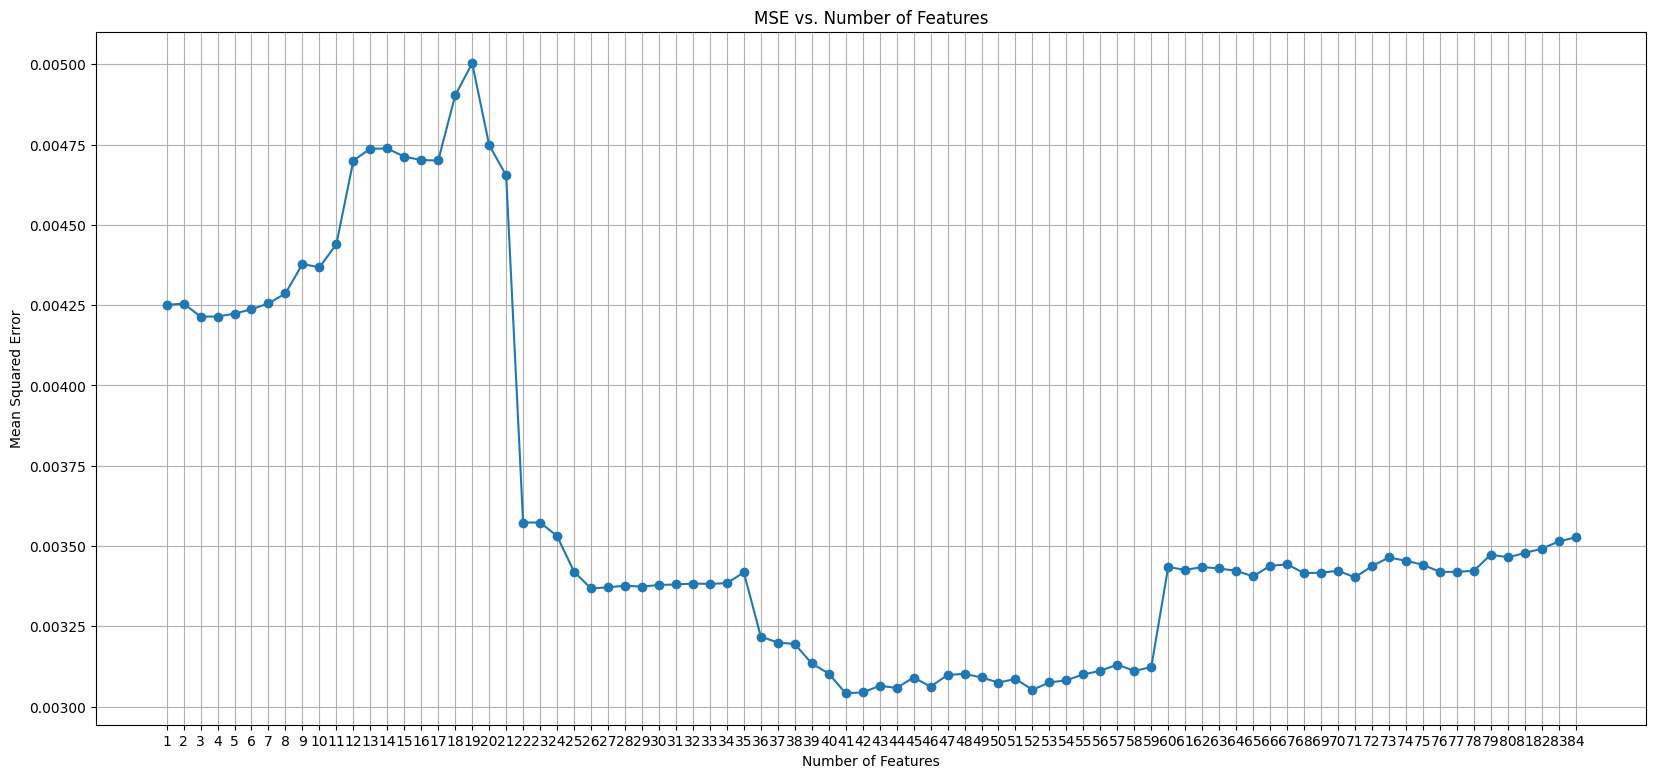

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sorted_df, y, test_size=0.3, random_state=42)


# Initialize lists to store MSE values and coefficients
mse_values = []
coefficients = []

# Iterate through each feature
for i in range(X.shape[1]):
    # Select features up to the current index
    X_i_train = X_train.iloc[:, :i+1]
    
    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_i_train, y_train)
    
    # Predict
    X_i_test = X_test.iloc[:, :i+1]
    y_pred = model.predict(X_i_test)
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    
    # Store coefficients
    coefficients.append(model.coef_)

# Plot MSE values
plt.figure(figsize=(20, 9))
plt.plot(range(1, X.shape[1]+1), mse_values, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Number of Features')
plt.xticks(range(1, X.shape[1]+1))
plt.grid(True)
plt.show()


In [23]:
selected_kbest_features = sorted_df.iloc[:, :41].columns

In [24]:
selected_kbest_features

Index(['R_DEBT_INCOME', 'R_DEBT_SAVINGS', 'DEBT', 'R_EXPENDITURE_DEBT',
       'R_UTILITIES_DEBT', 'R_TAX_DEBT', 'R_EDUCATION_INCOME',
       'R_GROCERIES_DEBT', 'R_ENTERTAINMENT_DEBT', 'R_HEALTH_DEBT',
       'R_SAVINGS_INCOME', 'R_CLOTHING_DEBT', 'R_TRAVEL_DEBT',
       'CAT_CREDIT_CARD', 'R_HOUSING_DEBT', 'R_EDUCATION_SAVINGS',
       'R_UTILITIES_SAVINGS', 'R_HEALTH_SAVINGS', 'R_GROCERIES_SAVINGS',
       'CAT_GAMBLING', 'CAT_DEBT', 'R_EXPENDITURE', 'R_GROCERIES_INCOME',
       'R_HEALTH_INCOME', 'R_ENTERTAINMENT_INCOME', 'R_ENTERTAINMENT',
       'R_HOUSING_SAVINGS', 'R_GAMBLING_INCOME', 'CAT_DEPENDENTS',
       'R_EDUCATION_DEBT', 'CAT_SAVINGS_ACCOUNT', 'R_GROCERIES', 'R_TRAVEL',
       'R_GAMBLING_DEBT', 'R_CLOTHING_SAVINGS', 'T_ENTERTAINMENT_12',
       'R_EXPENDITURE_SAVINGS', 'R_HEALTH', 'T_GROCERIES_6',
       'R_GAMBLING_SAVINGS', 'T_EDUCATION_12'],
      dtype='object')

In [32]:
zero_features_kbest = df.drop(columns=selected_kbest_features).columns
zero_features_kbest

Index(['INCOME', 'SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6', 'R_CLOTHING',
       'R_CLOTHING_INCOME', 'T_EDUCATION_6', 'R_EDUCATION',
       'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT_SAVINGS', 'T_FINES_12',
       'T_FINES_6', 'R_FINES', 'R_FINES_INCOME', 'R_FINES_SAVINGS',
       'R_FINES_DEBT', 'T_GAMBLING_12', 'T_GAMBLING_6', 'R_GAMBLING',
       'T_GROCERIES_12', 'T_HEALTH_12', 'T_HEALTH_6', 'T_HOUSING_12',
       'T_HOUSING_6', 'R_HOUSING', 'R_HOUSING_INCOME', 'T_TAX_12', 'T_TAX_6',
       'R_TAX', 'R_TAX_INCOME', 'R_TAX_SAVINGS', 'T_TRAVEL_12', 'T_TRAVEL_6',
       'R_TRAVEL_INCOME', 'R_TRAVEL_SAVINGS', 'T_UTILITIES_12',
       'T_UTILITIES_6', 'R_UTILITIES', 'R_UTILITIES_INCOME',
       'T_EXPENDITURE_12', 'T_EXPENDITURE_6', 'R_EXPENDITURE_INCOME',
       'CAT_MORTGAGE', 'CREDIT_SCORE'],
      dtype='object')

## Lasso Regression

In [25]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.shape, y.shape

((1000, 84), (1000,))

In [26]:
len(X.columns)

84

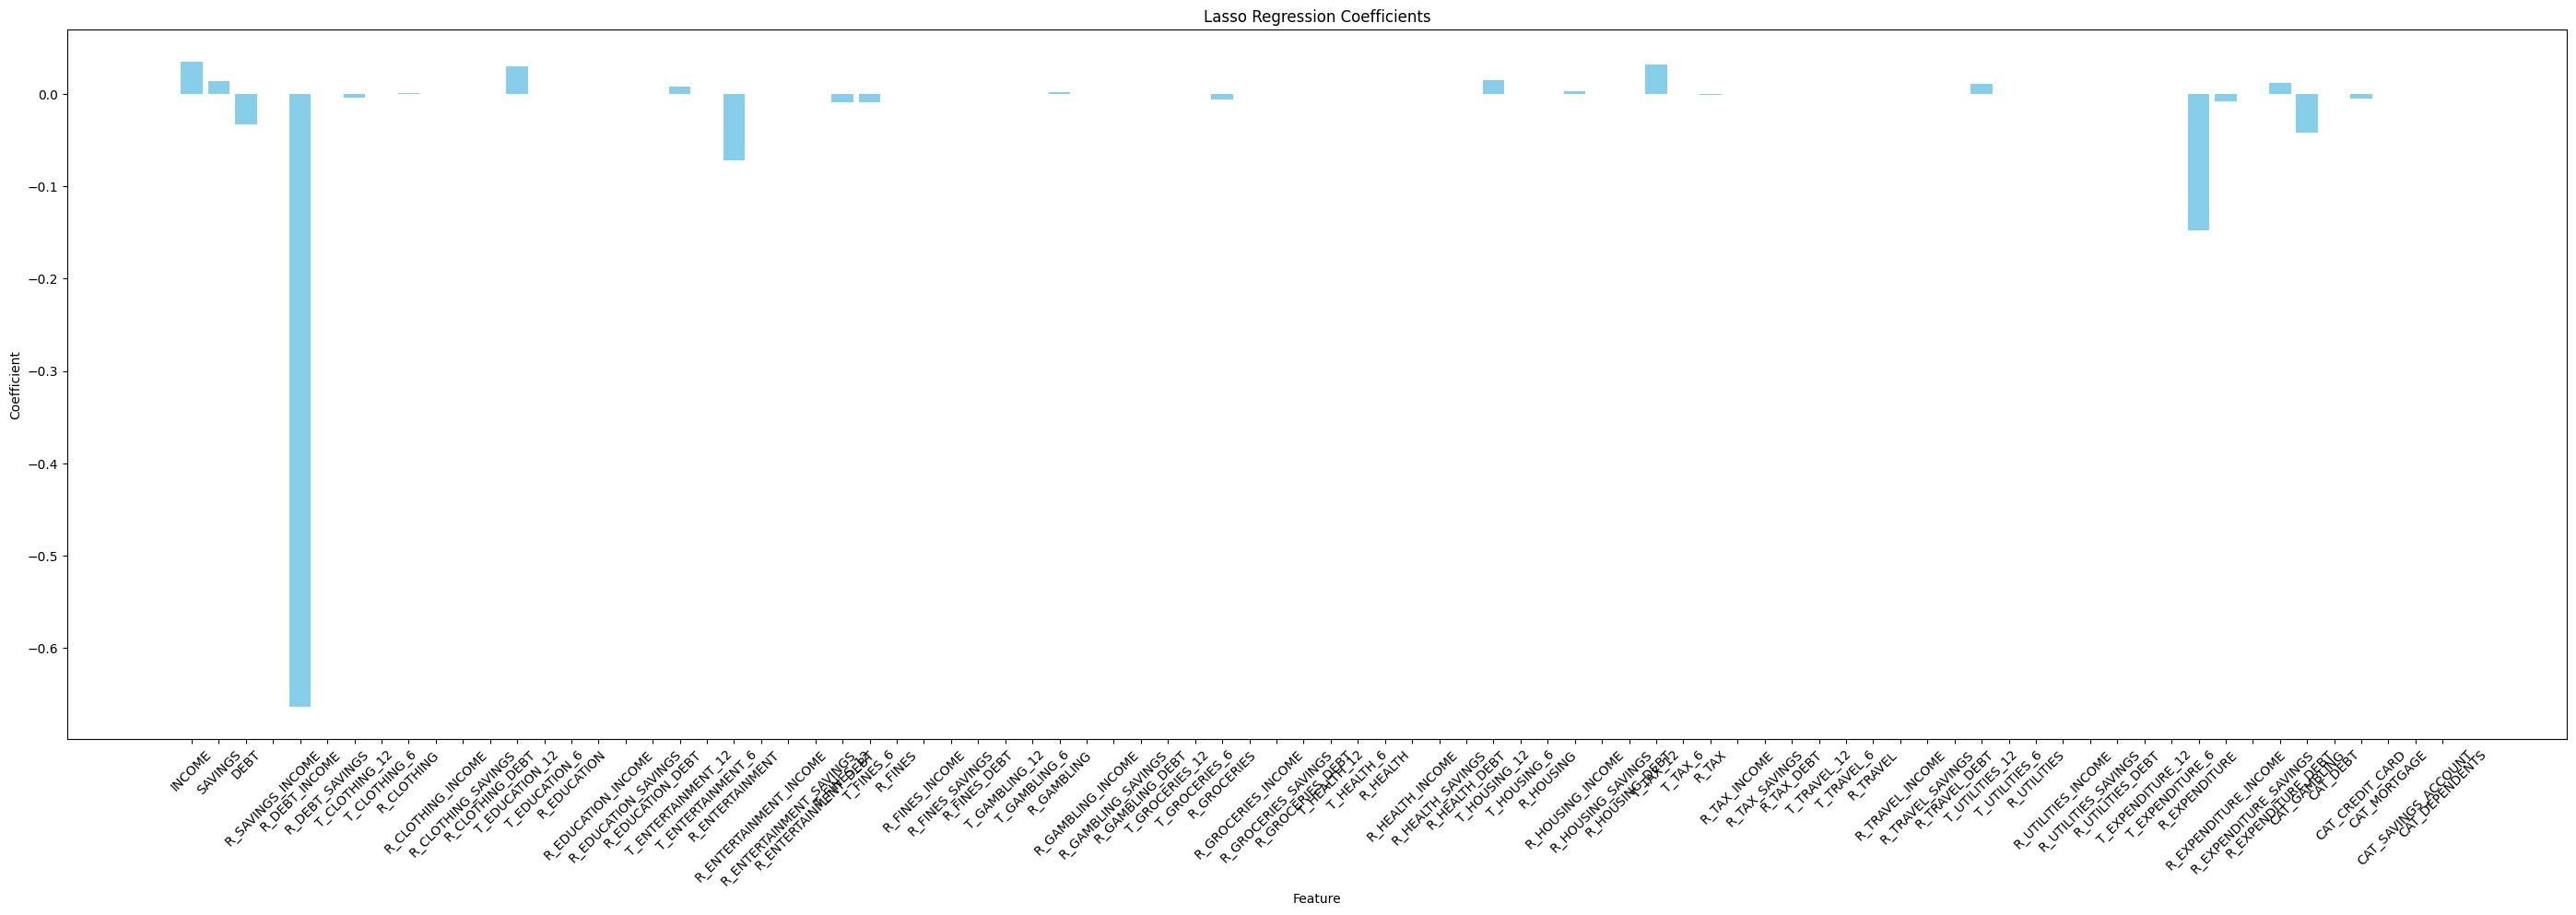

Selected Features:
Index(['INCOME', 'SAVINGS', 'DEBT', 'R_DEBT_INCOME', 'T_CLOTHING_12',
       'R_CLOTHING', 'T_EDUCATION_12', 'T_ENTERTAINMENT_12', 'R_ENTERTAINMENT',
       'T_FINES_12', 'T_FINES_6', 'R_GAMBLING', 'R_GROCERIES', 'T_HOUSING_12',
       'R_HOUSING_INCOME', 'T_TAX_12', 'R_TAX', 'T_UTILITIES_12',
       'R_EXPENDITURE', 'R_EXPENDITURE_INCOME', 'R_EXPENDITURE_DEBT',
       'CAT_GAMBLING', 'CAT_CREDIT_CARD'],
      dtype='object')


In [27]:
from sklearn.linear_model import LassoCV

# Fit LassoCV model
lasso_cv = LassoCV(cv=5)  # Use cross-validation to find the best regularization parameter
lasso_cv.fit(X, y)

# Extract selected features
selected_features_lasso = X.columns[lasso_cv.coef_ != 0]

# Plot feature coefficients
plt.figure(figsize=(35, 10))
plt.bar(X.columns, lasso_cv.coef_, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Lasso Regression Coefficients')
plt.xticks(rotation=45)
plt.show()

# Print selected features
print("Selected Features:")
print(selected_features_lasso)

In [28]:
len(selected_features_lasso)

23

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 84 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCOME                   1000 non-null   float64
 1   SAVINGS                  1000 non-null   float64
 2   DEBT                     1000 non-null   float64
 3   R_SAVINGS_INCOME         1000 non-null   float64
 4   R_DEBT_INCOME            1000 non-null   float64
 5   R_DEBT_SAVINGS           1000 non-null   float64
 6   T_CLOTHING_12            1000 non-null   float64
 7   T_CLOTHING_6             1000 non-null   float64
 8   R_CLOTHING               1000 non-null   float64
 9   R_CLOTHING_INCOME        1000 non-null   float64
 10  R_CLOTHING_SAVINGS       1000 non-null   float64
 11  R_CLOTHING_DEBT          1000 non-null   float64
 12  T_EDUCATION_12           1000 non-null   float64
 13  T_EDUCATION_6            1000 non-null   float64
 14  R_EDUCATION              

In [33]:
selected_df = X[selected_features_lasso]
selected_df

,INCOME,SAVINGS,DEBT,R_DEBT_INCOME,T_CLOTHING_12,R_CLOTHING,T_EDUCATION_12,T_ENTERTAINMENT_12,R_ENTERTAINMENT,T_FINES_12,...,T_HOUSING_12,R_HOUSING_INCOME,T_TAX_12,R_TAX,T_UTILITIES_12,R_EXPENDITURE,R_EXPENDITURE_INCOME,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_CREDIT_CARD
0,0.050248,0.000000,0.089184,0.432425,0.043671,0.472739,0.000000,0.049065,0.293363,0.000000,...,0.036100,0.210919,0.000000,0.595138,0.045406,0.711912,0.249944,0.006247,1.0,0.0
1,0.116536,0.031316,0.052885,0.110563,0.134505,0.018048,0.000000,0.275776,0.287582,0.000000,...,0.196219,0.494167,0.115970,0.500900,0.138753,0.320078,0.181777,0.022208,0.0,0.0
2,0.046696,0.007432,0.089613,0.467560,0.026748,0.702353,0.000000,0.057749,0.573152,0.025334,...,0.033134,0.208119,0.000000,0.548319,0.041699,0.694415,0.249944,0.005777,1.0,0.0
3,0.121821,0.022160,0.105405,0.210807,0.158525,0.507985,0.115148,0.215036,0.300654,0.000000,...,0.151545,0.365142,0.098454,0.637455,0.107735,0.568399,0.249944,0.012813,1.0,0.0
4,0.226510,0.402662,0.402024,0.432425,0.045729,0.153832,0.000000,0.083065,0.314731,0.000000,...,0.512291,0.663556,0.231646,0.364046,0.504194,0.501060,0.181777,0.005677,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.496745,0.503137,0.921732,0.452082,0.386106,0.573278,0.000000,0.156375,0.286576,0.000000,...,0.959925,0.566962,0.394522,0.500300,0.941524,0.605161,0.181777,0.005427,1.0,1.0
996,0.122949,0.030498,0.114069,0.226042,0.124841,0.338751,0.000000,0.461210,0.623680,0.000000,...,0.000000,0.000000,0.169870,0.499400,0.169723,0.438848,0.181777,0.010864,0.0,0.0
997,0.000000,0.014571,0.005154,0.221318,0.000000,0.829538,0.000000,0.000000,0.569382,0.000000,...,0.009367,0.478535,0.000000,0.484394,0.013071,1.000000,0.300037,0.034462,0.0,0.0
998,0.054390,0.002748,0.101226,0.453444,0.046076,0.602570,0.251694,0.057365,0.303419,0.000000,...,0.042621,0.230051,0.000000,0.473589,0.053502,0.836515,0.333258,0.006616,0.0,1.0


In [34]:
zero_features_lasso = X.columns[lasso_cv.coef_ == 0]
zero_features_lasso

Index(['R_SAVINGS_INCOME', 'R_DEBT_SAVINGS', 'T_CLOTHING_6',
       'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS', 'R_CLOTHING_DEBT',
       'T_EDUCATION_6', 'R_EDUCATION', 'R_EDUCATION_INCOME',
       'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT', 'T_ENTERTAINMENT_6',
       'R_ENTERTAINMENT_INCOME', 'R_ENTERTAINMENT_SAVINGS',
       'R_ENTERTAINMENT_DEBT', 'R_FINES', 'R_FINES_INCOME', 'R_FINES_SAVINGS',
       'R_FINES_DEBT', 'T_GAMBLING_12', 'T_GAMBLING_6', 'R_GAMBLING_INCOME',
       'R_GAMBLING_SAVINGS', 'R_GAMBLING_DEBT', 'T_GROCERIES_12',
       'T_GROCERIES_6', 'R_GROCERIES_INCOME', 'R_GROCERIES_SAVINGS',
       'R_GROCERIES_DEBT', 'T_HEALTH_12', 'T_HEALTH_6', 'R_HEALTH',
       'R_HEALTH_INCOME', 'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT', 'T_HOUSING_6',
       'R_HOUSING', 'R_HOUSING_SAVINGS', 'R_HOUSING_DEBT', 'T_TAX_6',
       'R_TAX_INCOME', 'R_TAX_SAVINGS', 'R_TAX_DEBT', 'T_TRAVEL_12',
       'T_TRAVEL_6', 'R_TRAVEL', 'R_TRAVEL_INCOME', 'R_TRAVEL_SAVINGS',
       'R_TRAVEL_DEBT', 'T_UTI

In [35]:
len(zero_features_lasso)

61

In [36]:
selected_df

,INCOME,SAVINGS,DEBT,R_DEBT_INCOME,T_CLOTHING_12,R_CLOTHING,T_EDUCATION_12,T_ENTERTAINMENT_12,R_ENTERTAINMENT,T_FINES_12,...,T_HOUSING_12,R_HOUSING_INCOME,T_TAX_12,R_TAX,T_UTILITIES_12,R_EXPENDITURE,R_EXPENDITURE_INCOME,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_CREDIT_CARD
0,0.050248,0.000000,0.089184,0.432425,0.043671,0.472739,0.000000,0.049065,0.293363,0.000000,...,0.036100,0.210919,0.000000,0.595138,0.045406,0.711912,0.249944,0.006247,1.0,0.0
1,0.116536,0.031316,0.052885,0.110563,0.134505,0.018048,0.000000,0.275776,0.287582,0.000000,...,0.196219,0.494167,0.115970,0.500900,0.138753,0.320078,0.181777,0.022208,0.0,0.0
2,0.046696,0.007432,0.089613,0.467560,0.026748,0.702353,0.000000,0.057749,0.573152,0.025334,...,0.033134,0.208119,0.000000,0.548319,0.041699,0.694415,0.249944,0.005777,1.0,0.0
3,0.121821,0.022160,0.105405,0.210807,0.158525,0.507985,0.115148,0.215036,0.300654,0.000000,...,0.151545,0.365142,0.098454,0.637455,0.107735,0.568399,0.249944,0.012813,1.0,0.0
4,0.226510,0.402662,0.402024,0.432425,0.045729,0.153832,0.000000,0.083065,0.314731,0.000000,...,0.512291,0.663556,0.231646,0.364046,0.504194,0.501060,0.181777,0.005677,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.496745,0.503137,0.921732,0.452082,0.386106,0.573278,0.000000,0.156375,0.286576,0.000000,...,0.959925,0.566962,0.394522,0.500300,0.941524,0.605161,0.181777,0.005427,1.0,1.0
996,0.122949,0.030498,0.114069,0.226042,0.124841,0.338751,0.000000,0.461210,0.623680,0.000000,...,0.000000,0.000000,0.169870,0.499400,0.169723,0.438848,0.181777,0.010864,0.0,0.0
997,0.000000,0.014571,0.005154,0.221318,0.000000,0.829538,0.000000,0.000000,0.569382,0.000000,...,0.009367,0.478535,0.000000,0.484394,0.013071,1.000000,0.300037,0.034462,0.0,0.0
998,0.054390,0.002748,0.101226,0.453444,0.046076,0.602570,0.251694,0.057365,0.303419,0.000000,...,0.042621,0.230051,0.000000,0.473589,0.053502,0.836515,0.333258,0.006616,0.0,1.0


In [37]:
selected_features_lasso

Index(['INCOME', 'SAVINGS', 'DEBT', 'R_DEBT_INCOME', 'T_CLOTHING_12',
       'R_CLOTHING', 'T_EDUCATION_12', 'T_ENTERTAINMENT_12', 'R_ENTERTAINMENT',
       'T_FINES_12', 'T_FINES_6', 'R_GAMBLING', 'R_GROCERIES', 'T_HOUSING_12',
       'R_HOUSING_INCOME', 'T_TAX_12', 'R_TAX', 'T_UTILITIES_12',
       'R_EXPENDITURE', 'R_EXPENDITURE_INCOME', 'R_EXPENDITURE_DEBT',
       'CAT_GAMBLING', 'CAT_CREDIT_CARD'],
      dtype='object')

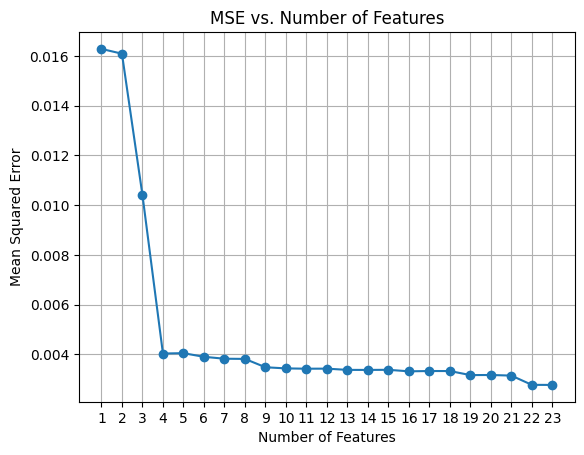

"coefficients = np.array(coefficients).T\nplt.plot(range(1, selected_df.shape[1]+1), coefficients)\nplt.xlabel('Number of Features')\nplt.ylabel('Coefficient Value')\nplt.title('Coefficients vs. Number of Features')\nplt.legend([f'Feature {i}' for i in range(1, selected_df.shape[1]+1)], loc='upper left')\nplt.grid(True)\nplt.show()"

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_df, y, test_size=0.3, random_state=42)

# Initialize lists to store MSE values and coefficients
mse_values = []
coefficients = []

# Iterate through each feature
for i in range(selected_df.shape[1]):
    # Select features up to the current index
    X_i_train = X_train.iloc[:, :i+1]
    
    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_i_train, y_train)
    
    # Predict
    X_i_test = X_test.iloc[:, :i+1]
    y_pred = model.predict(X_i_test)
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    
    # Store coefficients
    coefficients.append(model.coef_)

# Plot MSE values
plt.plot(range(1, selected_df.shape[1]+1), mse_values, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Number of Features')
plt.xticks(range(1, selected_df.shape[1]+1))
plt.grid(True)
plt.show()

# Plot coefficients
'''coefficients = np.array(coefficients).T
plt.plot(range(1, selected_df.shape[1]+1), coefficients)
plt.xlabel('Number of Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs. Number of Features')
plt.legend([f'Feature {i}' for i in range(1, selected_df.shape[1]+1)], loc='upper left')
plt.grid(True)
plt.show()'''


In [39]:
print(list(set(selected_kbest_features).intersection(selected_features_lasso)))

['R_EXPENDITURE_DEBT', 'T_EDUCATION_12', 'CAT_GAMBLING', 'R_DEBT_INCOME', 'CAT_CREDIT_CARD', 'DEBT', 'R_GROCERIES', 'R_ENTERTAINMENT', 'T_ENTERTAINMENT_12', 'R_EXPENDITURE']


## Intersection of Lasso and SelectKBest zeroized features

In [40]:
print(len(zero_features_kbest), len(zero_features_lasso))

44 61


In [41]:
zeroized_features = list(set(zero_features_lasso).intersection(zero_features_kbest))
len(zeroized_features)

30

In [42]:
zeroized_features

['T_ENTERTAINMENT_6',
 'R_FINES',
 'T_TRAVEL_12',
 'T_HOUSING_6',
 'T_EDUCATION_6',
 'R_HOUSING',
 'R_TAX_INCOME',
 'R_TRAVEL_SAVINGS',
 'T_UTILITIES_6',
 'R_FINES_DEBT',
 'T_HEALTH_6',
 'R_CLOTHING_INCOME',
 'T_CLOTHING_6',
 'R_EDUCATION',
 'CAT_MORTGAGE',
 'R_FINES_SAVINGS',
 'R_ENTERTAINMENT_SAVINGS',
 'T_GAMBLING_12',
 'R_UTILITIES_INCOME',
 'T_EXPENDITURE_6',
 'T_HEALTH_12',
 'T_TAX_6',
 'T_GROCERIES_12',
 'T_EXPENDITURE_12',
 'T_GAMBLING_6',
 'R_TAX_SAVINGS',
 'T_TRAVEL_6',
 'R_TRAVEL_INCOME',
 'R_UTILITIES',
 'R_FINES_INCOME']

In [43]:
main_df = X.drop(columns=zeroized_features)
main_df

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,R_CLOTHING,R_CLOTHING_SAVINGS,R_CLOTHING_DEBT,...,R_UTILITIES_DEBT,R_EXPENDITURE,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS
0,0.050248,0.000000,0.089184,0.000000,0.432425,0.004098,0.043671,0.472739,0.000000,0.002762,...,0.001717,0.711912,0.249944,0.000000,0.006247,1.0,1.0,0.0,0.0,0.0
1,0.116536,0.031316,0.052885,0.073353,0.110563,0.011820,0.134505,0.018048,0.038053,0.014518,...,0.009089,0.320078,0.181777,0.076844,0.022208,0.0,1.0,0.0,1.0,0.0
2,0.046696,0.007432,0.089613,0.043448,0.467560,0.084394,0.026748,0.702353,0.031910,0.001736,...,0.001616,0.694415,0.249944,0.142719,0.005777,1.0,1.0,0.0,1.0,0.0
3,0.121821,0.022160,0.105405,0.049655,0.210807,0.033294,0.158525,0.507985,0.063402,0.008600,...,0.003535,0.568399,0.249944,0.124876,0.012813,1.0,1.0,0.0,1.0,0.0
4,0.226510,0.402662,0.402024,0.485265,0.432425,0.006988,0.045729,0.153832,0.001014,0.000631,...,0.004343,0.501060,0.181777,0.011618,0.005677,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.496745,0.503137,0.921732,0.276491,0.452082,0.012823,0.386106,0.573278,0.006799,0.002367,...,0.003535,0.605161,0.181777,0.020390,0.005427,1.0,1.0,1.0,1.0,1.0
996,0.122949,0.030498,0.114069,0.067711,0.226042,0.026180,0.124841,0.338751,0.036264,0.006233,...,0.005150,0.438848,0.181777,0.083248,0.010864,0.0,1.0,0.0,1.0,0.0
997,0.000000,0.014571,0.005154,0.200972,0.221318,0.002476,0.000000,0.829538,0.000000,0.000000,...,0.008786,1.000000,0.300037,0.024975,0.034462,0.0,1.0,0.0,1.0,0.0
998,0.054390,0.002748,0.101226,0.013792,0.453444,0.257831,0.046076,0.602570,0.148574,0.002604,...,0.001818,0.836515,0.333258,0.499525,0.006616,0.0,1.0,1.0,1.0,0.0


In [44]:
main_df.to_csv("Data/final_data.csv", index=False)

In [45]:
selected_features = [item for item in X.columns if item not in zeroized_features]
selected_features

['INCOME',
 'SAVINGS',
 'DEBT',
 'R_SAVINGS_INCOME',
 'R_DEBT_INCOME',
 'R_DEBT_SAVINGS',
 'T_CLOTHING_12',
 'R_CLOTHING',
 'R_CLOTHING_SAVINGS',
 'R_CLOTHING_DEBT',
 'T_EDUCATION_12',
 'R_EDUCATION_INCOME',
 'R_EDUCATION_SAVINGS',
 'R_EDUCATION_DEBT',
 'T_ENTERTAINMENT_12',
 'R_ENTERTAINMENT',
 'R_ENTERTAINMENT_INCOME',
 'R_ENTERTAINMENT_DEBT',
 'T_FINES_12',
 'T_FINES_6',
 'R_GAMBLING',
 'R_GAMBLING_INCOME',
 'R_GAMBLING_SAVINGS',
 'R_GAMBLING_DEBT',
 'T_GROCERIES_6',
 'R_GROCERIES',
 'R_GROCERIES_INCOME',
 'R_GROCERIES_SAVINGS',
 'R_GROCERIES_DEBT',
 'R_HEALTH',
 'R_HEALTH_INCOME',
 'R_HEALTH_SAVINGS',
 'R_HEALTH_DEBT',
 'T_HOUSING_12',
 'R_HOUSING_INCOME',
 'R_HOUSING_SAVINGS',
 'R_HOUSING_DEBT',
 'T_TAX_12',
 'R_TAX',
 'R_TAX_DEBT',
 'R_TRAVEL',
 'R_TRAVEL_DEBT',
 'T_UTILITIES_12',
 'R_UTILITIES_SAVINGS',
 'R_UTILITIES_DEBT',
 'R_EXPENDITURE',
 'R_EXPENDITURE_INCOME',
 'R_EXPENDITURE_SAVINGS',
 'R_EXPENDITURE_DEBT',
 'CAT_GAMBLING',
 'CAT_DEBT',
 'CAT_CREDIT_CARD',
 'CAT_SAVINGS_A

# Not used algorithms

## SelectKBest with mutual_info_regression

In [ ]:
from sklearn.feature_selection import mutual_info_regression
# configure to select all features
fs = SelectKBest(score_func=mutual_info_regression, k='all')

In [ ]:
# Define the number of iterations
num_iterations = 5
scores_dict = dict()
# Iterate over the number of iterations
for iteration in range(num_iterations):
    # Randomly choose 600 rows
    chosen_idx = np.random.choice(X.shape[0], replace=False, size=600)
    
    # Subset data and labels
    data_chosen = X.iloc[chosen_idx].reset_index(drop=True)
    label_chosen = y.iloc[chosen_idx].reset_index(drop=True)
    
    # Perform feature selection
    selected_features = fs.fit_transform(data_chosen, label_chosen)
    
    # Get indices of selected features
    # selected_indices = fs.pvalues_
    
    selected_indices = np.argsort(fs.scores_)[::-1]
    selected_features = X.columns[selected_indices]
    
    if not scores_dict:
        for key, value in zip(selected_features, np.sort(fs.scores_)[::-1]):
            scores_dict[key] = [value]
    else:
        for key, value in zip(selected_features, np.sort(fs.scores_)[::-1]):
            scores_dict[key].append(value)
        
    # Print selected features (indices)
    print(f"Iteration {iteration + 1}: Selected features indices: {list(zip(selected_features, np.sort(fs.scores_)[::-1]))}")

scores_mean_dict  = scores_dict.copy()
for key, value in scores_dict.items():
    scores_mean_dict[key] = np.mean(value)

In [ ]:
print(sorted(scores_mean_dict.items(), key=lambda x: x[1], reverse=True))

In [ ]:
sorted_scores = sorted(scores_mean_dict.items(), key=lambda x: x[1], reverse=True)
sorted_features = [x[0] for x in sorted_scores]
sorted_values = [x[1] for x in sorted_scores]

# Create bar plot
plt.figure(figsize=(10, 20))
plt.barh(sorted_features, sorted_values, color='skyblue')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Scores')
plt.gca().invert_yaxis()  # Invert y-axis to show highest score on top
plt.show()

## RandomForestRegressor

In [20]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor()

# Fit the model
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 4 (0.740022)
2. feature 74 (0.038404)
3. feature 33 (0.011514)
4. feature 59 (0.010260)
5. feature 20 (0.009624)
6. feature 38 (0.007172)
7. feature 0 (0.006921)
8. feature 2 (0.006230)
9. feature 77 (0.006102)
10. feature 73 (0.005311)
11. feature 31 (0.004952)
12. feature 44 (0.004734)
13. feature 42 (0.004670)
14. feature 62 (0.004518)
15. feature 14 (0.004462)
16. feature 1 (0.004359)
17. feature 32 (0.004330)
18. feature 30 (0.004237)
19. feature 55 (0.004048)
20. feature 54 (0.003913)
21. feature 8 (0.003731)
22. feature 68 (0.003645)
23. feature 9 (0.003508)
24. feature 26 (0.003466)
25. feature 72 (0.003384)
26. feature 11 (0.003380)
27. feature 41 (0.003369)
28. feature 45 (0.003223)
29. feature 60 (0.003196)
30. feature 71 (0.003174)
31. feature 56 (0.003077)
32. feature 7 (0.002953)
33. feature 61 (0.002772)
34. feature 6 (0.002680)
35. feature 43 (0.002645)
36. feature 5 (0.002534)
37. feature 18 (0.002480)
38. feature 21 (0.002467)
39. feature 7

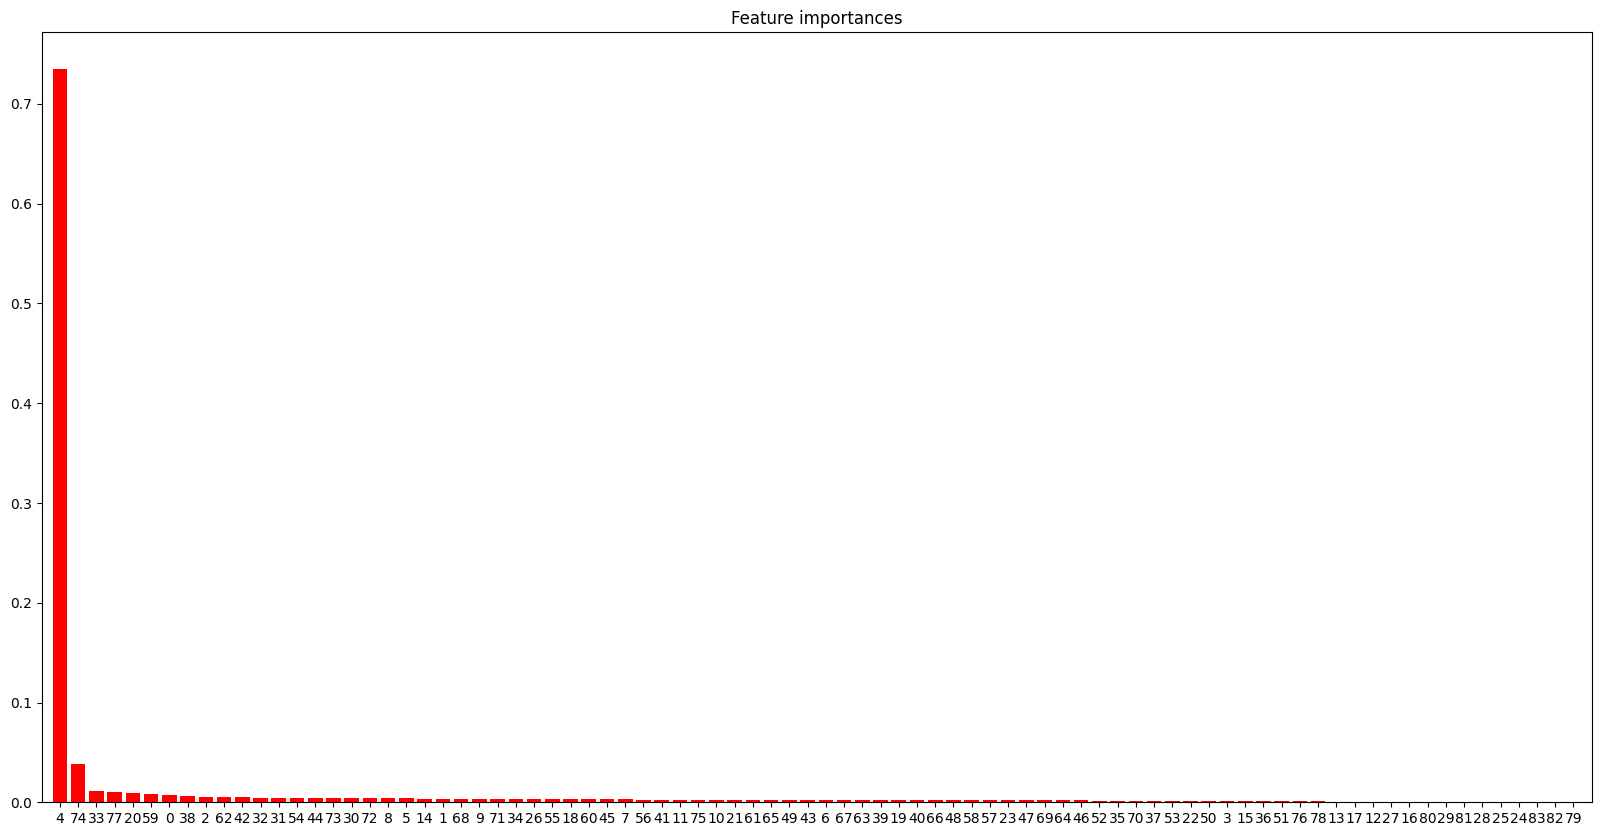

In [10]:
# Plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [11]:
# printing in order of importance 
X.columns[indices]

Index(['R_DEBT_INCOME', 'R_EXPENDITURE', 'R_GAMBLING_INCOME',
       'R_EXPENDITURE_DEBT', 'R_ENTERTAINMENT', 'R_TAX_DEBT', 'INCOME',
       'R_GROCERIES', 'DEBT', 'R_TRAVEL', 'T_HEALTH_12', 'R_GAMBLING',
       'T_GAMBLING_6', 'T_TAX_12', 'R_HEALTH', 'T_EXPENDITURE_6',
       'T_GAMBLING_12', 'T_EXPENDITURE_12', 'R_CLOTHING', 'R_DEBT_SAVINGS',
       'R_EDUCATION', 'SAVINGS', 'R_UTILITIES', 'R_CLOTHING_INCOME',
       'R_UTILITIES_DEBT', 'R_GAMBLING_SAVINGS', 'R_FINES', 'T_TAX_6',
       'T_ENTERTAINMENT_12', 'T_TRAVEL_12', 'R_HEALTH_INCOME', 'T_CLOTHING_6',
       'R_TAX', 'R_GROCERIES_DEBT', 'R_CLOTHING_DEBT', 'R_EXPENDITURE_INCOME',
       'R_CLOTHING_SAVINGS', 'R_ENTERTAINMENT_INCOME', 'T_TRAVEL_6',
       'R_TRAVEL_DEBT', 'T_HOUSING_6', 'T_HEALTH_6', 'T_CLOTHING_12',
       'T_UTILITIES_6', 'R_TRAVEL_INCOME', 'R_GROCERIES_INCOME',
       'T_ENTERTAINMENT_6', 'R_GROCERIES_SAVINGS', 'T_UTILITIES_12',
       'T_HOUSING_12', 'R_TAX_SAVINGS', 'R_TAX_INCOME', 'R_ENTERTAINMENT_DEBT',
  

## GradientBoostingRegressor

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Assuming X_train and y_train are your training features and target
# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()

# Fit the model
gb_model.fit(X, y)

# Get feature importances
importances = gb_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))



Feature ranking:
1. feature 4 (0.784163)
2. feature 74 (0.048716)
3. feature 33 (0.016568)
4. feature 59 (0.014692)
5. feature 20 (0.012847)
6. feature 0 (0.010464)
7. feature 30 (0.008002)
8. feature 54 (0.007423)
9. feature 60 (0.004496)
10. feature 6 (0.004324)
11. feature 31 (0.004112)
12. feature 77 (0.003874)
13. feature 73 (0.003697)
14. feature 48 (0.003674)
15. feature 2 (0.003247)
16. feature 38 (0.003154)
17. feature 72 (0.003029)
18. feature 42 (0.003022)
19. feature 1 (0.002683)
20. feature 49 (0.002530)
21. feature 57 (0.002464)
22. feature 75 (0.002387)
23. feature 19 (0.002374)
24. feature 41 (0.002272)
25. feature 55 (0.002233)
26. feature 32 (0.002182)
27. feature 18 (0.002003)
28. feature 61 (0.001811)
29. feature 39 (0.001781)
30. feature 66 (0.001705)
31. feature 9 (0.001636)
32. feature 8 (0.001627)
33. feature 10 (0.001575)
34. feature 43 (0.001538)
35. feature 65 (0.001315)
36. feature 21 (0.001289)
37. feature 62 (0.001282)
38. feature 26 (0.001222)
39. feature

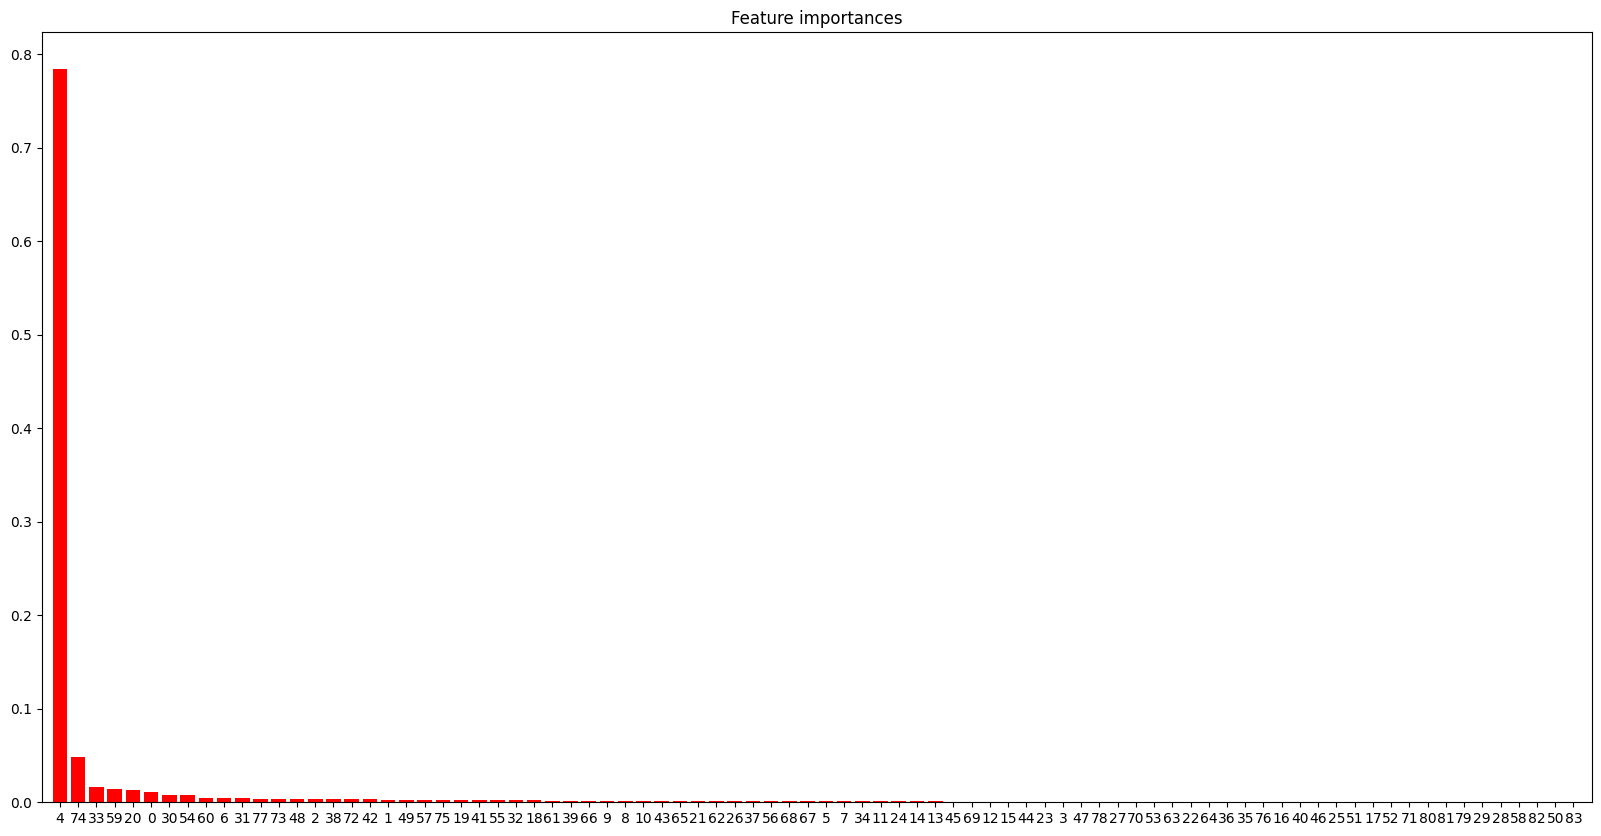

In [17]:
# Plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [110]:
# printing in order of importance
X.columns[indices]

Index(['R_SAVINGS_INCOME', 'T_EXPENDITURE_6', 'R_GAMBLING', 'R_TAX_SAVINGS',
       'T_ENTERTAINMENT_6', 'CAT_DEPENDENTS', 'R_FINES_DEBT', 'R_HOUSING_DEBT',
       'R_HEALTH_DEBT', 'R_TAX_DEBT', 'T_GAMBLING_12', 'R_DEBT_SAVINGS',
       'R_EXPENDITURE_SAVINGS', 'T_EXPENDITURE_12', 'R_UTILITIES_DEBT',
       'SAVINGS', 'T_GROCERIES_6', 'R_GROCERIES_DEBT', 'T_ENTERTAINMENT_12',
       'INCOME', 'R_TAX', 'R_EXPENDITURE', 'R_GROCERIES_SAVINGS',
       'T_GAMBLING_6', 'T_TAX_12', 'T_TRAVEL_12', 'T_CLOTHING_6',
       'R_GROCERIES', 'R_CLOTHING', 'T_HEALTH_12', 'R_CLOTHING_INCOME',
       'T_TRAVEL_6', 'R_EDUCATION_DEBT', 'R_TRAVEL_SAVINGS', 'R_ENTERTAINMENT',
       'R_TRAVEL_DEBT', 'T_FINES_6', 'T_TAX_6', 'T_UTILITIES_6',
       'T_GROCERIES_12', 'T_HOUSING_12', 'T_UTILITIES_12', 'R_GAMBLING_INCOME',
       'R_DEBT_INCOME', 'T_CLOTHING_12', 'R_CLOTHING_SAVINGS', 'R_TRAVEL',
       'R_ENTERTAINMENT_DEBT', 'T_EDUCATION_6', 'R_HEALTH', 'T_EDUCATION_12',
       'R_UTILITIES', 'R_TRAVEL_INCOME'

In [18]:
# indices of important columns
indexes = []
i = 0
while indices[i]!=13:
    i += 1
    indexes.append(indices[i])
print(indexes)    

[74, 33, 59, 20, 0, 30, 54, 60, 6, 31, 77, 73, 48, 2, 38, 72, 42, 1, 49, 57, 75, 19, 41, 55, 32, 18, 61, 39, 66, 9, 8, 10, 43, 65, 21, 62, 26, 37, 56, 68, 67, 5, 7, 34, 11, 24, 14, 13]


In [19]:
gbr_columns = X.columns[indexes]
gbr_columns

Index(['R_EXPENDITURE', 'R_GAMBLING_INCOME', 'R_TAX_DEBT', 'R_ENTERTAINMENT',
       'INCOME', 'T_GAMBLING_12', 'T_TAX_12', 'T_TRAVEL_12', 'T_CLOTHING_12',
       'T_GAMBLING_6', 'R_EXPENDITURE_DEBT', 'T_EXPENDITURE_6', 'T_HOUSING_12',
       'DEBT', 'R_GROCERIES', 'T_EXPENDITURE_12', 'T_HEALTH_12', 'SAVINGS',
       'T_HOUSING_6', 'R_TAX_INCOME', 'R_EXPENDITURE_INCOME',
       'T_ENTERTAINMENT_6', 'R_GROCERIES_DEBT', 'T_TAX_6', 'R_GAMBLING',
       'T_ENTERTAINMENT_12', 'T_TRAVEL_6', 'R_GROCERIES_INCOME',
       'T_UTILITIES_12', 'R_CLOTHING_INCOME', 'R_CLOTHING',
       'R_CLOTHING_SAVINGS', 'T_HEALTH_6', 'R_TRAVEL_DEBT',
       'R_ENTERTAINMENT_INCOME', 'R_TRAVEL', 'R_FINES', 'T_GROCERIES_6',
       'R_TAX', 'R_UTILITIES', 'T_UTILITIES_6', 'R_DEBT_SAVINGS',
       'T_CLOTHING_6', 'R_GAMBLING_SAVINGS', 'R_CLOTHING_DEBT', 'T_FINES_12',
       'R_EDUCATION', 'T_EDUCATION_6'],
      dtype='object')

## PCA

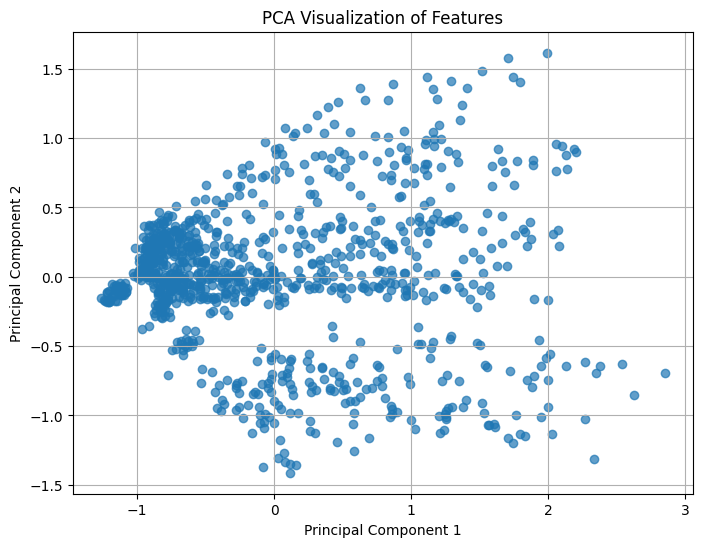

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X is your feature matrix
# Instantiate PCA with desired number of components
pca = PCA(n_components=2)  # You can change the number of components as needed

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Features')
plt.grid(True)
plt.show()
